# A look at the joint likelihood ratio and joint score

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

## Load data

In [5]:
theta = np.load("../data/samples/theta_debug.npy")
x = np.load("../data/samples/x_debug.npy")
y = np.load("../data/samples/y_debug.npy")
t_xz = np.load("../data/samples/t_xz_debug.npy")
r_xz = np.load("../data/samples/r_xz_debug.npy")
z = np.load("../data/samples/z_debug.npy")

In [38]:
f_sub = theta[y==0][:,0]
beta = theta[y==0][:,1]

m_host = z[y==0][:,0]
n_sub_realiz = z[y==0][:,7]
f_sub_realiz = z[y==0][:,8]

t_xz0 = t_xz[y==0][:,0]
t_xz1 = t_xz[y==0][:,1]
r_xz_inverse = r_xz[y==1].flatten()
r_xz_ = r_xz[y==0].flatten()

## Plot parameters vs subhalo properties

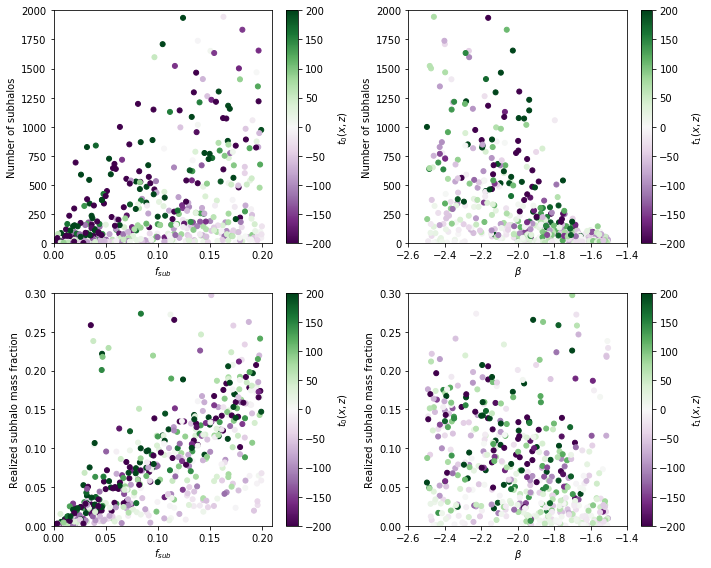

In [70]:
skip = 1
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(2,2,1)
sc = plt.scatter(
    f_sub[::skip], n_sub_realiz[::skip],
    s=25.,
    c=t_xz0, vmin=-200, vmax=200, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$t_0(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,2)
plt.scatter(
    beta[::skip], n_sub_realiz[::skip],
    s=25., 
    c=t_xz1, vmin=-100, vmax=100, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$t_1(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,3)
sc = plt.scatter(
    f_sub[::skip], f_sub_realiz[::skip],
    s=25.,
    c=t_xz0, vmin=-200, vmax=200, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$t_0(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,0.3)

ax = plt.subplot(2,2,4)
plt.scatter(
    beta[::skip], f_sub_realiz[::skip],
    s=25., 
    c=t_xz1, vmin=-100, vmax=100, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$t_1(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,0.3)

plt.tight_layout()
plt.savefig("../figures/theta_vs_subhalo_params_vs_joint_score.pdf")

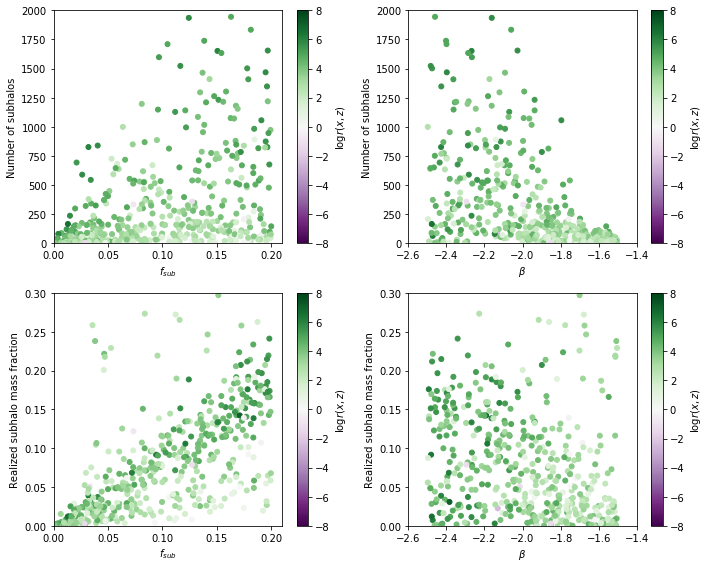

In [72]:
skip = 1
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(2,2,1)
sc = plt.scatter(
    f_sub[::skip], n_sub_realiz[::skip],
    s=25.,
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,2)
plt.scatter(
    beta[::skip], n_sub_realiz[::skip],
    s=25., 
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Number of subhalos")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,2000.)

ax = plt.subplot(2,2,3)
sc = plt.scatter(
    f_sub[::skip], f_sub_realiz[::skip],
    s=25.,
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$f_{sub}$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(0.,0.21)
plt.ylim(0.,0.3)

ax = plt.subplot(2,2,4)
plt.scatter(
    beta[::skip], f_sub_realiz[::skip],
    s=25., 
    c=np.log(r_xz_[::skip]), vmin=-8, vmax=8, cmap='PRGn',
)
cbar = plt.colorbar(sc)
plt.xlabel(r"$\beta$")
plt.ylabel("Realized subhalo mass fraction")
cbar.set_label(r"$\log r(x,z)$")
plt.xlim(-2.6,-1.4)
plt.ylim(0.,0.3)

plt.tight_layout()
plt.savefig("../figures/theta_vs_subhalo_params_vs_joint_ratio.pdf")

## Expectation values

In [56]:
np.mean(1./r_xz_), np.std(1./r_xz_) / 500**0.5

(0.1171807276400159, 0.02560518278345762)

In [57]:
np.mean(r_xz_inverse), np.std(r_xz_inverse) / 500**0.5

(0.8565274499120408, 0.2532415465653465)

In [58]:
np.mean(t_xz0), np.std(t_xz0) / 500**0.5

(-31.036356387235887, 15.927676368294623)

In [59]:
np.mean(t_xz1), np.std(t_xz1) / 500**0.5

(3.0043075215830988, 3.1082738041102607)

In [68]:
np.mean(t_xz0[f_sub_realiz<f_sub*0.9]), np.mean(t_xz0[(f_sub*0.9<f_sub_realiz)*(f_sub_realiz< f_sub*1.1)]), np.mean(t_xz0[f_sub_realiz>f_sub*1.1])

(-57.17858557965996, 14.459461390315926, 23.684276720048096)

In [69]:
np.mean(t_xz1[f_sub_realiz<f_sub*0.9]), np.mean(t_xz1[(f_sub*0.9<f_sub_realiz)*(f_sub_realiz< f_sub*1.1)]), np.mean(t_xz1[f_sub_realiz>f_sub*1.1])

(2.1520412680617573, 3.4483082813092483, 5.745740500358122)